# Info
Name:  

    ATDM Proposal dust heating rate

Purpose:  

    Make some figures for the ATMD proposal
    Focus on the heating rate profiles obtained during ORACLES 2018 transit back, near Cabo Verde, with SSFR
  
Input:

    None
  
Output:

    Figures
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
    - 
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - for_Sam_20181025.out
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-08-23
    Modified: 

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st
import scipy.io as sio

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
fp =getpath('ORACLES')

Return path named:  ORACLES /mnt/c/Users/sleblanc/Research/ORACLES/


# Load files

## Load the SSFR files

In [10]:
ssfr = sio.idl.readsav(fp+'data_other_2018/SSFR/for_Sam_20181025_SSFR.out')

In [11]:
ssfr.keys()

['utc', 'zenlambda', 'nadlambda', 'shsw', 'zenspectra', 'nadspectra']

## Load the 4STAR file

In [14]:
s = lu.load_ict(fp+'aod_ict_2018/4STAR-AOD_P3_20181025_R1.ict')

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'flag_acaod', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650')


In [17]:
sp = sio.loadmat(fp+'data_2018/4STAR_20181025starsun.mat')

# Run analysis and prepare variables
Do some of the calculations to the data here

Get the location of the dust profile

<IPython.core.display.Javascript object>


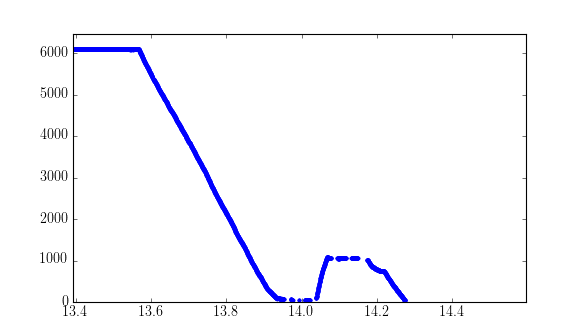

In [21]:
plt.figure()
plt.plot(s['Start_UTC'],s['GPS_Alt'],'.')

# Plotting
Present some fo the early plots here